# **Import data**

**Note**: This dataset does not include the latest albums: Lover, folklore and evermore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

# **First look**

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/taylor-swift-song-data-from-all-the-albumse/taylor_swift_lyrics.csv


In [3]:
df = pd.read_csv(r'/kaggle/input/taylor-swift-song-data-from-all-the-albumse/taylor_swift_lyrics.csv')
df.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       4862 non-null   object
 1   album        4862 non-null   object
 2   track_title  4862 non-null   object
 3   track_n      4862 non-null   int64 
 4   lyric        4862 non-null   object
 5   line         4862 non-null   int64 
 6   year         4862 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 266.0+ KB


<AxesSubplot:>

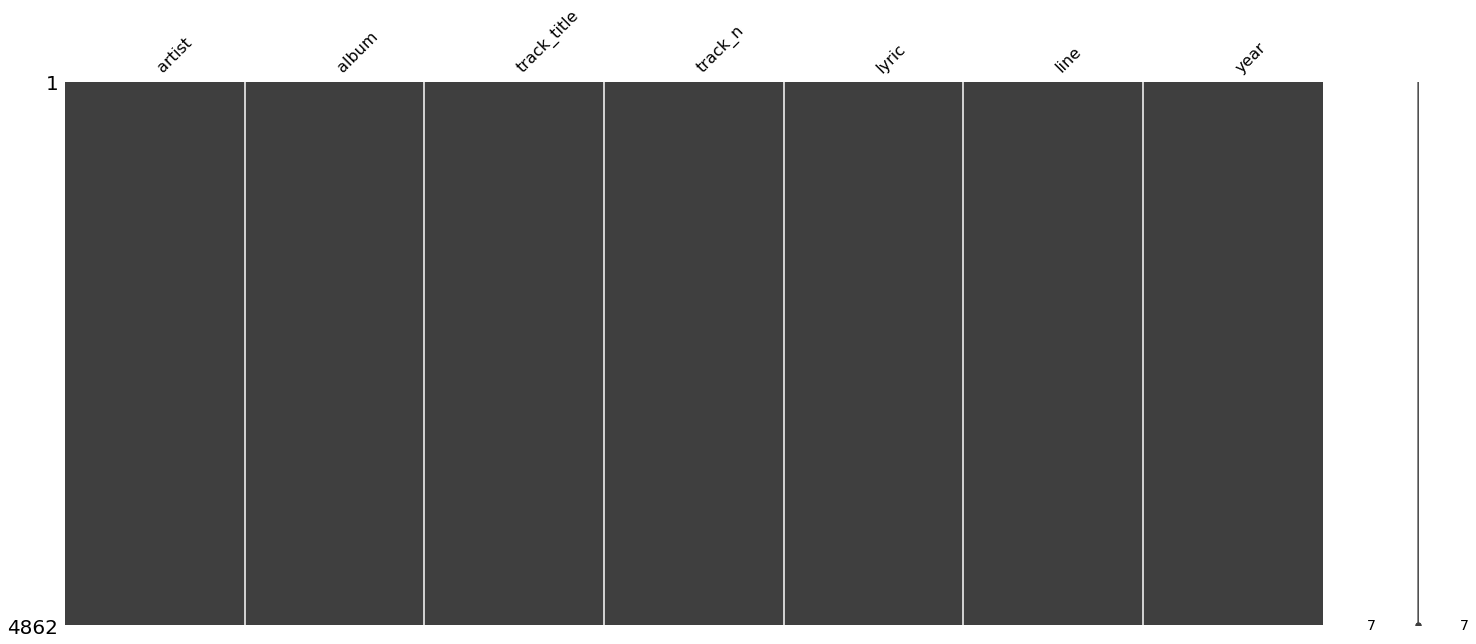

In [5]:
msno.matrix(df)

# **Data analysis**

## **Artist**

In [6]:
df[['artist']].value_counts().reset_index()

,artist,0
0,Taylor Swift,4862


In [7]:
df_plot = df.groupby(by=['artist'])['track_title'].size().sort_values().reset_index(name='count')
fig = px.bar(df_plot, x = 'artist', y = 'count',title = 'Total count of Artist')
fig.update_traces(width=0.2)
fig.show()

In [8]:
#Simple graph type
#plot = sns.displot(data=df, x= "artist", kind="hist", kde=False)
#plt.show()

## **Artist conclusion**

Looks like all the songs in this dataframe are from Taylor Swift, Damond.

## **Album**

In [9]:
df[['album']].value_counts().reset_index()

,album,0
0,reputation,1006
1,1989,953
2,Speak Now,930
3,Red,845
4,Taylor Swift,567
5,Fearless,561


In [10]:
#Looks like the dataframe is ordered by year already
df_plot = df.groupby(by=['year','album'])['album'].size().reset_index(name='count')
fig = px.bar(df_plot, x = 'album', y = 'count',title = 'Total count by Album',color="album",pattern_shape="album")
fig.show()

In [11]:
#Simple graph  type
#plot = sns.displot(data=df, x= "album", kind="hist" ,kde=False)
#plt.xticks(rotation=50)
#plt.show()

## **Album conclusion**

- From the album variable, the album reputation has more than 1000 entries
- Feraless is the album with less entries: 561
- 4 of 6 albums have more than 800 lines (entries)

## **Track title**

In [12]:
df[['track_title']].value_counts().reset_index(name='count')

,track_title,count
0,End Game (Ft. Ed Sheeran & Future),101
1,I Wish You Would,83
2,Blank Space,83
3,Enchanted,80
4,Delicate,78
...,...,...
89,Holy Ground,30
90,A Place In This World,27
91,Cold as You,24
92,A Perfectly Good Heart,23


In [13]:
#You can place your mouse on the chart and see each track # lines
df_plot = df.groupby(by=['year','album','track_n','track_title'])['track_title'].size().sort_values().reset_index(name='count')
#df_plot
fig = px.bar(df_plot, x = 'track_title', y = 'count')
fig.show()

In [14]:
#This way is more rustic but it works to know the # of lines per song
#plt.figure(figsize=(20,10))
#df.track_title.value_counts().plot.bar()
#plt.xticks(rotation=90)
#plt.show()

In [15]:
# The plot already order the tack # in each Album by year
df_plot = df.groupby(by=['year','album','track_n','track_title'])['track_title'].size().reset_index(name='count')
fig = px.bar(df_plot, x = 'track_title', y = 'count', color = 'album')
fig.show()

## **Track title conclusion**
- End Game ft Ed Sheeran & Future from Album reputation is the song, from all dataset, with most entries with 101 entires
- Sad Beautiful Tragic from Album Red is the song, from all dataset, with less entries with 22 entries
- Track title with most | less entries by Album:
    - Taylor Swift Album: Stay Beautiful & Tim McGraw with 55 lines || A Perfectly Good Heart with 23 lines
    - Fearless Album: Forever & Always with 50 lines || The Best Day with 34 lines
    - Speak Now: Enchanted with 80 || Ours 40 with lines
    - Red: The Last Time with 64 || Sad Beautiful Tragic with 22 lines
    - 1989: Blank Space & I Wish You Would with 83 entries ||Clean with 35 lines
    - reputation: End Game with 101 entries || New Year´s Day with 47 lines


## **Track number**

- **Note**: Even if we look by track number is the same as track title in this data set, but if we look which Album has more songs it´s a different story

In [16]:
df_plot = df.groupby(by=['year','album','track_n','track_title'])['track_n'].size().reset_index(name='count')
fig = px.bar(df_plot, x = 'album', y = 'track_n',color='year')
fig.update_yaxes(showticklabels=False)
fig.show()

## **Track number conclusion**
- Most of the Taylor´s albums have 13 tracks
- Even if Red has more tracks (19 tracks) in the top 4 (800< entries) it´s the last in this top, while reputation who has over 1000 entries only have 15 tracks
- Exist a relationship between Jake Gyllenhaal - short term - Speak Now & Harry Styles - short term - Red???

## **Lyric**

In [17]:
df1 = df[df.album == 'Taylor Swift']
df2 = df[df.album == 'Fearless']
df3 = df[df.album == 'Speak Now']
df4 = df[df.album == 'Red']
df5 = df[df.album == '1989']
df6 = df[df.album == 'reputation']

In [18]:
def numb (df_n):
    df_n["mytext_new"] = df_n['lyric'].str.lower().str.replace('[^\w\s]','')
    new_df = df_n.mytext_new.str.split(expand=True).stack().value_counts().reset_index() 
    new_df.columns = ['Word', 'Frequency'] 
    return new_df.head(20)
    

In [19]:
def word (df_n):
    wordCloud = WordCloud(
       max_font_size=50, max_words=50, background_color="black").generate(' '.join(x for x in df_n.lyric))
    plt.axis('off')
    plt.imshow(wordCloud,interpolation='bilinear')
    plt.show()

In [20]:
#Change the number in df to give you detailed number of words
#numb(df)

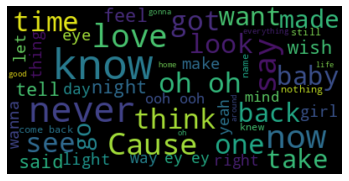

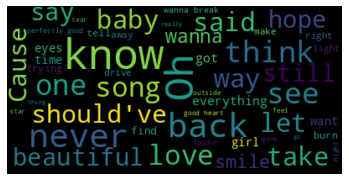

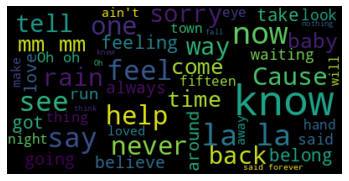

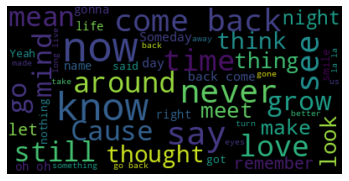

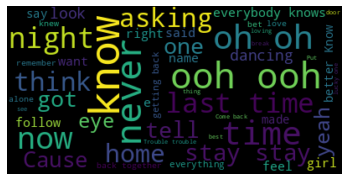

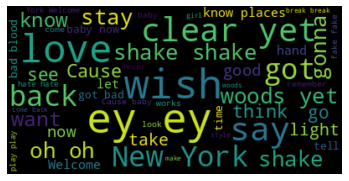

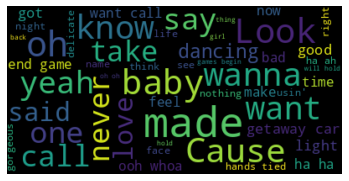

In [21]:
word(df)
word(df1)
word(df2)
word(df3)
word(df4)
word(df5)
word(df6)

## **Lyric conlusion**
- If we count all the words in the dataset the words [you & i] have the most frecuency respectivly
- If we use WordCloud in all the dataset looks like the mos common word is "know"

## **Line & year**

Looks like the line values will be equal to track_title,track_n and lyrics and year to track number graph so the analysis will not continue. If more information is added we will reevaluate the dataset.

To know more about Taylor Swift:

- Links to know more about Taylor´s musical/personal career: https://en.wikipedia.org/wiki/Taylor_Swift
- Taylors albums in order: https://www.hypable.com/taylor-swift-album-guide/